# **STEIN'S PARADOX**

 Suppose that I have a Gaussian distribution with a variance of unity and some mean which I don’t tell you. I then draw a single sample from this distribution, give it to you, and ask you to guess the mean. What do you do? Well, you don’t have a lot of information to go on here, so you just guess that the mean is the number I gave you. This is a good guess! 

 Now we play again, but this time, my distribution is a two-dimensional Gaussian. The covariance is the identity matrix (so this is equivalent to sampling from two independent one-dimensional Gaussians). But again I have not told you the mean (which is now a two-dimensional vector). Once more I draw a single sample from the distribution, hand it over to you, and ask you to guess the mean. You simply guess that the mean is the sample I have given you. Once more you have guessed well!

 Now we do the same thing in three dimensions. I draw a single sample, hand it over to you, and ask you to guess the mean. Just as before, you guess that the mean is the sample I gave you. But this is no longer a good guess! Stein’s paradox is that if we play this game in three dimensions or more, a better guess is to say that the mean is this: 

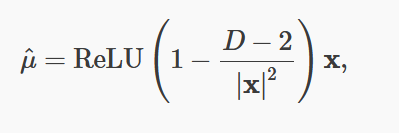

where D is the dimensionality of the Gaussian, and x is the sample drawn from the distribution. This is the so-called “James-Stein estimator." [https://joe-antognini.github.io/machine-learning/steins-paradox](http://)

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt

In [2]:
def SteinsParadox(nSamples,nDimesions):
    '''
    nSamples(int):The random number of samples anywhere between 2 to infinite
    nDimesions(int): The dimesions of the data "For steins paradox nDimesions should be more than 2"
    
    return(tuple): The tuple of two values:
                    [0]:The mean squared error of bestEstimator or picked value with means
                    [1]:The mean squared error of Stiens estimator and means
                    
    stein's estimator = (1-(2-nDimension/|X|))X
    '''
    #condition for steins paradox
    if nDimesions<3:
        return "Stein's should have atleast 3 three dimensions"
    #generating random samples with the input shapes
    randomValues=np.random.randn(nSamples,nDimesions)
    #mean of the random samples
    means=list(map(lambda x: np.mean(x),randomValues))
    #picking a value in each Data
    randomSamples=list(map(lambda x:np.random.choice(x,1),randomValues))
    #error of beat estimator
    bestEstimatorError=MSE(means,randomSamples)
    #computing the stien's estimator formula
    #stein's estimator = (1-(2-nDimension/|X|))X
    squared=list(map(lambda X:X*X,randomSamples))
    dinominator=sum(squared)
    nominator=nDimesions-2
    wholeValue=nominator/dinominator
    values=1-wholeValue
    steinsEstimator=list(map(lambda X:values*X, randomSamples))
    #computing the error of steins estimator
    steinsError=MSE(means,steinsEstimator)
    return bestEstimatorError,steinsError

In [3]:
dimension=3
samples=20
estimatorErrors=[]
steinsErrors=[]
for i in range(20):
    estimatorError,steinsError=SteinsParadox(samples,dimension)
    estimatorErrors.append(estimatorError)
    steinsErrors.append(steinsError)
    dimension+=1
dimensions=[i for i in range(3,23)]
dimensions

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

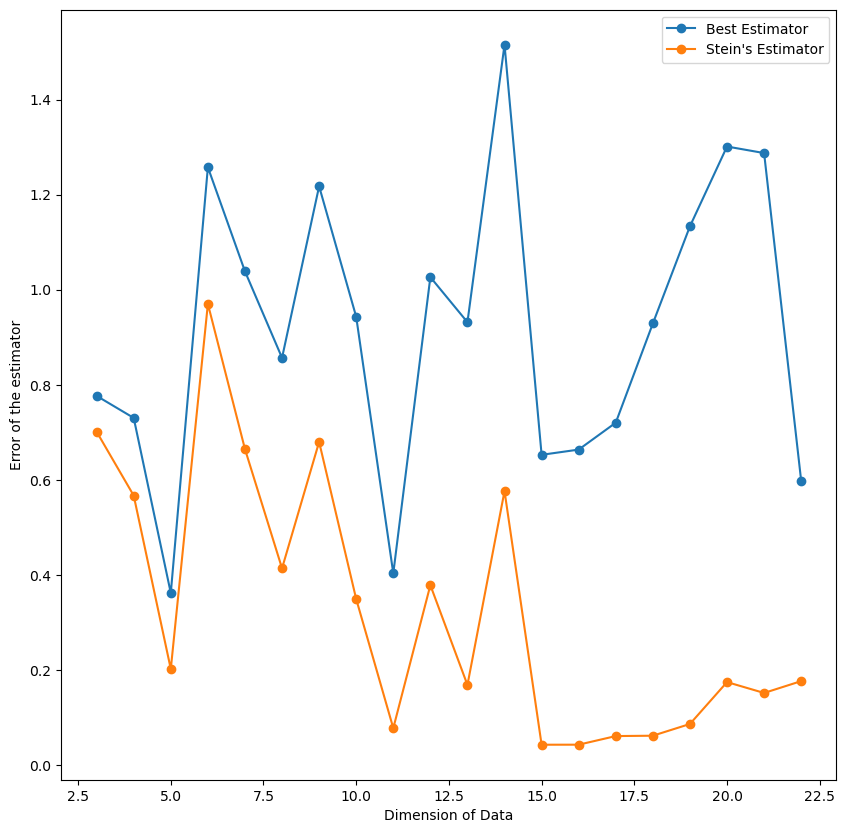

In [4]:
fig=plt.figure(figsize=(10,10))
plt.plot(dimensions,estimatorErrors,marker='o',linestyle='-',label='Best Estimator')
plt.plot(dimensions,steinsErrors,marker='o',linestyle='-',label="Stein's Estimator")
plt.xlabel('Dimension of Data')
plt.ylabel('Error of the estimator')
plt.legend()